In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot forecast maps with all available models.
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import json

from esio import EsioData as ed
from esio import ice_plot
from esio import import_data
from esio import metrics

import dask
import timeit

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

In [2]:
# from dask.distributed import Client
# client = Client(n_workers=8, )
# client
dask.config.set(scheduler='threads')  # overwrite default with threaded scheduler

In [3]:
metrics_all = ['mean_25km_1km']
runType = 'forecast'
variables = ['hi']

In [4]:
# Get path data
E = ed.EsioData.load()
grid_dir = E.grid_dir

# Load in regional data
ds_region = xr.open_dataset(os.path.join(grid_dir, 'sio_2016_mask_Update.nc'))

In [5]:
concat_dim_time = 'fore_time'
drop_coords = ['init_start','valid_start','valid_end']

In [6]:
cvar = variables[0]

In [7]:
# Define fig dir and make if doesn't exist
fig_dir = os.path.join('/home/disk/sipn/nicway/Nic/figures', 'model', 'MME', cvar, 'iceBridgeQL')
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [8]:
# ds_m = import_data.load_MME_by_init_end(E=E, runType=runType, variable=cvar, 
#                                     metrics=metrics_all)

In [8]:
ds_m = xr.open_zarr('/home/disk/sipn/nicway/data/model/zarr/hi.zarr')
ds_m

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days ... 72 days 74 days
  * init_end       (init_end) datetime64[ns] 2018-02-01 ... 2018-04-16
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
  * model          (model) object 'Observed' 'gfdlsipn' ... 'usnavyncep' 'MME'
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(1, 1, 1, 304, 448)>

In [9]:
%timeit ds_m.mean().values

345 ms ± 3.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


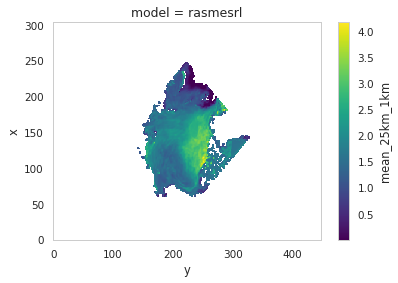

In [11]:
ds_m.sel(model='rasmesrl').mean(dim=['init_end','fore_time']).mean_25km_1km.plot()

In [13]:
ds_ALL = import_data.get_valid_time(ds=ds_m, init_dim='init_end')

In [14]:
ds_ALL

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
    valid_time     (init_end, fore_time) datetime64[ns] 2018-02-01 ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(1, 1, 1, 304, 448)>

In [15]:
ds_ALL.model

<xarray.DataArray 'model' (model: 6)>
array(['Observed', 'gfdlsipn', 'rasmesrl', 'usnavygofs', 'usnavyncep', 'MME'],
      dtype=object)
Coordinates:
  * model    (model) object 'Observed' 'gfdlsipn' 'rasmesrl' 'usnavygofs' ...

In [ ]:
# (f, axes) = ice_plot.multi_polar_axis(ncols=2, nrows=1,
#                  Nplots=3, sizefcter=10)
# it = 0
# ft = 0
# O = (ds_m.sel(model='Observed')).isel(fore_time=ft, init_end=it).mean_25km_1km
# M = (ds_m.sel(model='gfdlsipn')).isel(fore_time=ft, init_end=it).mean_25km_1km
# O.plot(ax=axes[0],x='lon',y='lat', transform=ccrs.PlateCarree())
# M.plot(ax=axes[1], x='lon',y='lat', transform=ccrs.PlateCarree())

In [ ]:
# (M-O).plot()

In [ ]:

# plt.scatter(ds_m.sel(model='Observed').lon.values, ds_m.sel(model='Observed').lat.values, 
#             transform=ccrs.PlateCarree(), c='r', marker='o', s=100)
# plt.scatter(ds_m.sel(model='gfdlsipn').lon.values, ds_m.sel(model='gfdpsipn').lat.values, 
#             transform=ccrs.PlateCarree(), c='k', marker='*')


In [ ]:
# Drop models we don't want
#ds_m = ds_m.where(ds_m.model!='dampedAnomaly', drop=True)

In [ ]:
# lat and lon get loaded as different for each file, set to constant except along x and y
# ds_m.coords['lat'] = ds_m.sel(model='Observed').isel(init_end=0,fore_time=0).lat.drop([concat_dim_time,'init_end','model'])
# ds_m.coords['lon'] = ds_m.sel(model='Observed').isel(init_end=0,fore_time=0).lon.drop([concat_dim_time,'init_end','model'])


In [ ]:
# # # Drop models that we don't evaluate (i.e. monthly means)
# # models_keep = [x for x in ds_m.model.values if x not in ['noaasipn','modcansipns_3','modcansipns_4']]
# # ds_m = ds_m.sel(model=models_keep)
# # ds_m

# # # Get list of dynamical models that are not observations
# dynamical_Models = [x for x in ds_m.model.values if x not in ['Observed','climatology','dampedAnomaly','dampedAnomalyTrend']]
# dynamical_Models

# # # Get list of all models
# all_Models = [x for x in ds_m.model.values if x not in ['Observed']]
# all_Models

# # # Add MME
# MME_avg = ds_m.sel(model=dynamical_Models).mean(dim='model') # only take mean over dynamical models
# MME_avg.coords['model'] = 'MME'
# MME_avg

# ds_ALL = xr.concat([ds_m, MME_avg], dim='model')
# ds_ALL.model


In [26]:
ds_ALL.load()

<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 31.1 31.25 31.4 31.55 31.69 31.84 31.99 ...
    lon            (x, y) float64 168.3 168.4 168.5 168.7 168.8 168.9 169.0 ...
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
    valid_time     (init_end, fore_time) datetime64[ns] 2018-02-01 ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 nan nan nan ...

In [16]:
def add_subplot_title(cmod, E, ax=None, statval=None):
    if cmod in E.model.keys():
        if statval:
            ax.set_title(E.model[cmod]['model_label']+'\n('+statval+')')
        else:
            ax.set_title(E.model[cmod]['model_label'])
    else:
        ax.set_title(cmod)

In [17]:
max_hi = 4

In [ ]:
# # Try to git flat array of lead time values
# tsize = ds_ALL.sel(model=cmod).mean_25km_1km.values.flatten().size
# lt = ds_ALL.fore_time.values
# for n in np.ones(int(tsize/lt.size)):
#     lt = np.concatenate((lt,lt))
# lt.size

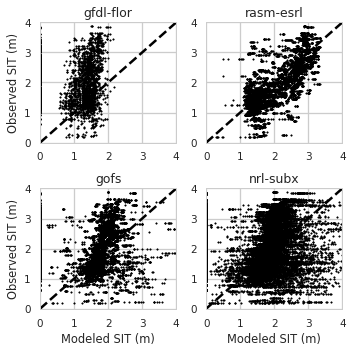

In [18]:
## Plot multi-panel scatter model vs obs
#
# For ALL inits and lead times
#
ncols = 2
nrows = 2
f, (axes) = plt.subplots(ncols=ncols, nrows=nrows)
f.set_size_inches((5,5))
axes = axes.reshape(-1)
cx = 0
for cmod in ds_ALL.model.values:
    if (cmod=='Observed') | (cmod=='MME'):
        continue
    axes[cx].scatter(ds_ALL.sel(model=cmod).mean_25km_1km.values.flatten(),
                     ds_ALL.sel(model='Observed').mean_25km_1km.values.flatten(), 
                     c='k', 
                     marker='.',
                     s=10)
    axes[cx].plot([0,max_hi],[0,max_hi],'k--')
    add_subplot_title(cmod, E, ax=axes[cx])
#     axes[cx].set_title(cmod)
    axes[cx].set_ylim([0,max_hi])
    axes[cx].set_xlim([0,max_hi])
    max_hi
    if cx in [0,2]:
        axes[cx].set_ylabel('Observed SIT (m)')
    if cx in [2,3]:
        axes[cx].set_xlabel('Modeled SIT (m)')
    
    cx = cx + 1
plt.tight_layout()
f_out = os.path.join(fig_dir,'HI_scatter_all_init_all_ft.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [19]:
import scipy

In [20]:
def get_pearsonr(x,y):
    I_ok = (~np.isnan(x)) & (~np.isnan(y))
    x = x[I_ok]
    y = y[I_ok]
    
    (r,p) = scipy.stats.pearsonr(x,y)
    return r

In [21]:
def get_rmse(x,y):
    I_ok = (~np.isnan(x)) & (~np.isnan(y))
    x = x[I_ok]
    y = y[I_ok]
    
    rmse = np.sqrt(np.mean((x-y)**2))
    return rmse

$r^2$=0.024, rmse=1.44
$r^2$=0.469, rmse=0.61
$r^2$=0.007, rmse=1.29
$r^2$=0.008, rmse=1.30
$r^2$=0.031, rmse=1.22


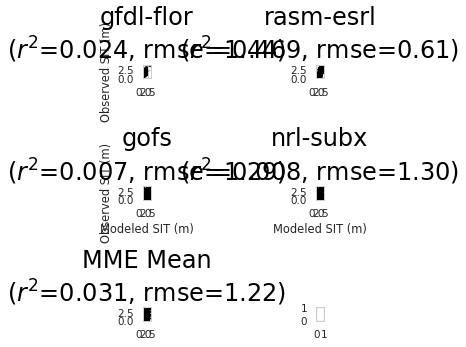

In [55]:
## Plot multi-panel scatter model vs obs
#
# For lead times < 1 week
#
sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})
mod_stats_dic = {}

ncols = 2
nrows = 3
f, (axes) = plt.subplots(ncols=ncols, nrows=nrows)
f.set_size_inches((5,5))
axes = axes.reshape(-1)
cx = 0
for cmod in ds_ALL.model.values:
    if (cmod=='Observed'):
        continue
    cmod_values = ds_ALL.isel(fore_time=slice(0,6)).sel(model=cmod).mean_25km_1km.values.flatten()
    cobs_values = ds_ALL.isel(fore_time=slice(0,6)).sel(model='Observed').mean_25km_1km.values.flatten()
    
    axes[cx].scatter(cmod_values,
                     cobs_values, 
                     c='k', 
                     marker='.',
                     s=10,
                     alpha=0.5)
    r = get_pearsonr(cmod_values, cobs_values)
    rmse = get_rmse(cmod_values, cobs_values)
    stat_str = '$r^2$={0:.3f}, '.format(r**2) + 'rmse={0:.2f}'.format(rmse)
    mod_stats_dic[cmod] = stat_str
    print(stat_str)
    axes[cx].plot([0,max_hi],[0,max_hi],'k--')
    add_subplot_title(cmod, E, ax=axes[cx], statval=stat_str)
#     axes[cx].set_title(cmod)
    axes[cx].set_ylim([0,max_hi])
    axes[cx].set_xlim([0,max_hi])
    max_hi
    if cx in [0,2]:
        axes[cx].set_ylabel('Observed SIT (m)')
    if cx in [2,3]:
        axes[cx].set_xlabel('Modeled SIT (m)')
    
    cx = cx + 1
plt.tight_layout()
f_out = os.path.join(fig_dir,'HI_scatter_all_init_1week_ft.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
## Plot multi-panel scatter model vs obs
#
# For lead times 2 week
#
ncols = 2
nrows = 2
f, (axes) = plt.subplots(ncols=ncols, nrows=nrows)
f.set_size_inches((5,5))
axes = axes.reshape(-1)
cx = 0
for cmod in ds_ALL.model.values:
    if (cmod=='Observed') | (cmod=='MME'):
        continue
    axes[cx].scatter(ds_ALL.isel(fore_time=slice(8,8+7)).sel(model=cmod).mean_25km_1km.values.flatten(),
                     ds_ALL.isel(fore_time=slice(8,8+7)).sel(model='Observed').mean_25km_1km.values.flatten(), 
                     c='k', 
                     marker='.',
                     s=10)
    axes[cx].plot([0,max_hi],[0,max_hi],'k--')
    add_subplot_title(cmod, E, ax=axes[cx])
#     axes[cx].set_title(cmod)
    axes[cx].set_ylim([0,max_hi])
    axes[cx].set_xlim([0,max_hi])
    max_hi
    if cx in [0,2]:
        axes[cx].set_ylabel('Observed SIT (m)')
    if cx in [2,3]:
        axes[cx].set_xlabel('Modeled SIT (m)')
    
    cx = cx + 1
plt.tight_layout()
f_out = os.path.join(fig_dir,'HI_scatter_all_init_2weeks_ft.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [41]:
def add_subplot_title(cmod, E, ax=None, statval=None, fontsize=24, fontcolor='k'):
    if cmod in E.model.keys():
        if statval:
            ax.set_title(E.model[cmod]['model_label']+'\n('+statval+')', fontsize=24, color=fontcolor)
        else:
            ax.set_title(E.model[cmod]['model_label'], fontsize=24, color=fontcolor)
    else:
        ax.set_title(cmod)

In [ ]:
# Trying new map plot, colored overlays and scatter plot

In [51]:
ds_ALL.model.values

array(['Observed', 'gfdlsipn', 'rasmesrl', 'usnavygofs', 'usnavyncep',
       'MME'], dtype=object)

In [56]:
mod_stats_dic['Observed'] = None
mod_colors = {'Observed':'k', 'gfdlsipn':'r', 'rasmesrl':'b', 
              'usnavygofs':'k', 'usnavyncep':'m','MME':'grey'}

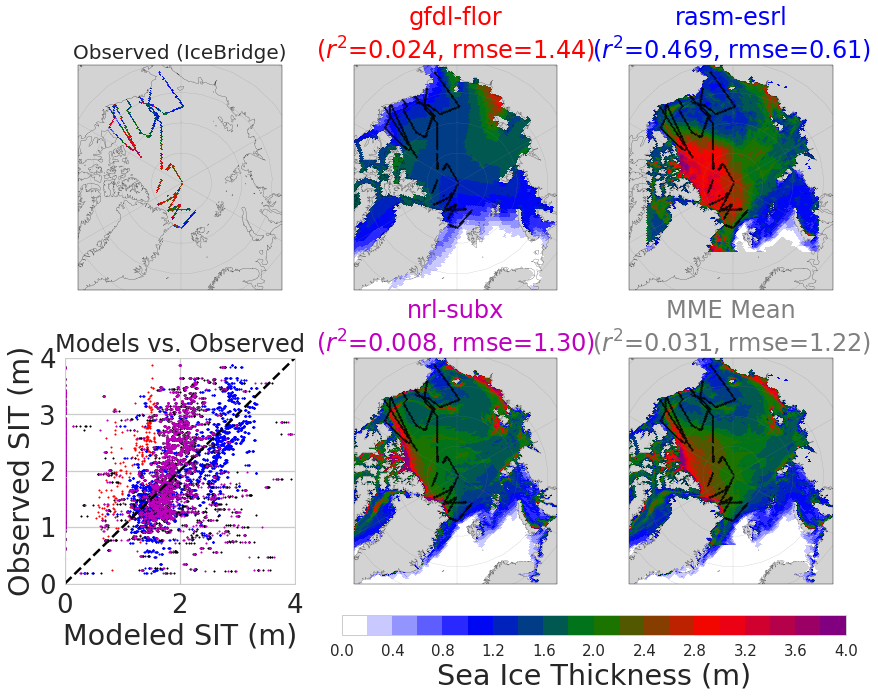

In [64]:
## Plot subplots of SIT, model with observed overlayed
# Set up color maps
sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 2.5})

N_cmap = 20
cmap_c = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","blue","green","red","purple"], N=N_cmap)
#cmap_c = matplotlib.colors.ListedColormap(sns.color_palette("Blues", N_cmap))

cmap_c.set_bad(color = 'lightgrey')
c_label = 'Sea Ice Thickness (m)'
c_vmin = 0
c_vmax = 4

cmap_b = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","black"], N=2)


nrows = 2#np.int(np.ceil(np.sqrt(ds_ALL.model.size)))
ncols = 3#nrows
Nplots = ds_ALL.model.size + 1

ft_start = 0
ft_end = 6 # inclusive!


# New Plot
central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
(f, axes) = ice_plot.multi_polar_axis(ncols=ncols, nrows=nrows, Nplots=Nplots, 
                                      extent=central_extent, central_longitude=0)

f.set_size_inches(14, 9)

for (i, cmod) in enumerate(ds_ALL.model.values): #['Observed']+dynamical_Models+['MME']):
    # Plot
    
    if cmod=='usnavygofs':
        axs = plt.subplot(2,3,4)

        axs.set_title('Models vs. Observed', fontsize=24)
        
        
        for cmod in ds_ALL.model.values:
            if (cmod=='Observed') | (cmod=='MME'):
                continue
            cmod_values = ds_ALL.isel(fore_time=slice(ft_start,ft_end)).sel(model=cmod).mean_25km_1km.values.flatten()
            cobs_values = ds_ALL.isel(fore_time=slice(ft_start,ft_end)).sel(model='Observed').mean_25km_1km.values.flatten()

            axs.scatter(cmod_values,
                             cobs_values, 
                             c = mod_colors[cmod],
                             marker='.',
                             s=10,
                             alpha=1)
#             r = get_pearsonr(cmod_values, cobs_values)
#             rmse = get_rmse(cmod_values, cobs_values)
#             stat_str = '$r^2$={0:.3f}, '.format(r**2) + 'rmse={0:.2f}'.format(rmse)

            
        axs.plot([0,max_hi],[0,max_hi],'k--')
        #add_subplot_title(cmod, E, ax=axes[cx], statval=stat_str)
    #     axes[cx].set_title(cmod)
        axs.set_ylim([0,max_hi])
        axs.set_xlim([0,max_hi])
        axs.set_ylabel('Observed SIT (m)')
        axs.set_xlabel('Modeled SIT (m)')
        
        
    else:
        add_subplot_title(cmod, E, ax=axes[i], fontsize=20, statval=mod_stats_dic[cmod], fontcolor=mod_colors[cmod])
        p = ds_ALL.sel(model=cmod).isel(fore_time=slice(ft_start,ft_end)).mean(dim=['init_end','fore_time']).mean_25km_1km.plot.pcolormesh(ax=axes[i], 
                                x='lon', y='lat', 
                                transform=ccrs.PlateCarree(),
                                add_colorbar=False,cmap=cmap_c,vmin=c_vmin, vmax=c_vmax)
        if cmod!='Observed':
            axes[i].scatter(ds_ALL.lon.values,
                           ds_ALL.lat.values,
                           c = ds_ALL.sel(model='Observed').isel(fore_time=slice(ft_start,ft_end)).mean(dim=['init_end','fore_time']).mean_25km_1km.values,
                           s = 1,
                           transform=ccrs.PlateCarree(),
                           cmap=cmap_b,vmin=c_vmin, vmax=c_vmax)
        add_subplot_title(cmod, E, ax=axes[i], fontsize=24, statval=mod_stats_dic[cmod], fontcolor=mod_colors[cmod])
        if cmod=='Observed':
             axes[i].set_title('Observed (IceBridge)', fontsize=20) 

# Make pretty
f.subplots_adjust(bottom=0.08, hspace=0.3)
# cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax = f.add_axes([0.4, 0.001, .5, 0.03]) #  [left, bottom, width, height] w
cbar = f.colorbar(p, cax=cbar_ax, label=c_label, orientation='horizontal')
cbar.set_ticks(np.arange(0,max_hi+0.1,max_hi/N_cmap*2))
cbar.ax.tick_params(labelsize=15) 
cbar.ax.yaxis.label.set_size(20)

# # Save to file
f_out = os.path.join(fig_dir,'SIT_maps_all_NEW_init_day_'+str(ft_start)+'_to_'+str(ft_end)+'_ft.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

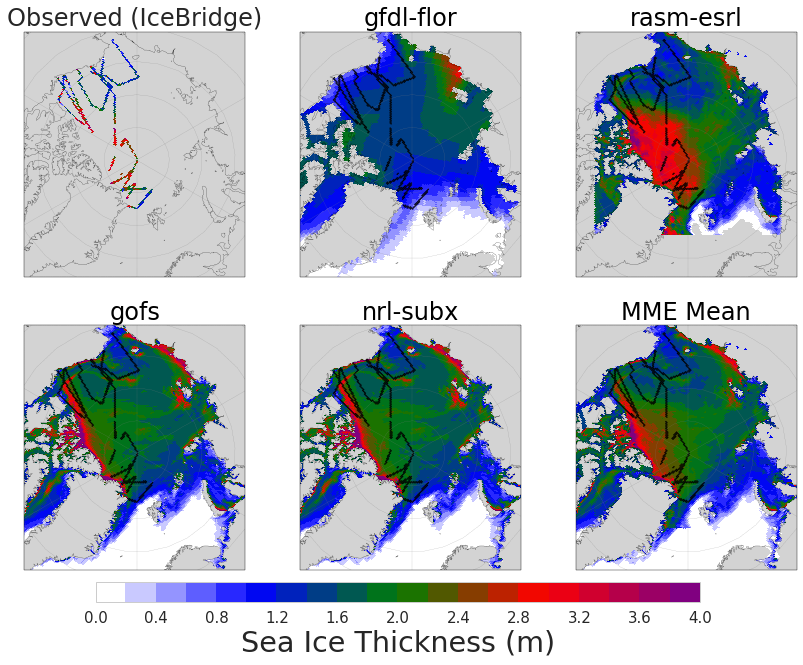

In [44]:
## Plot subplots of SIT, model with observed overlayed
# Set up color maps
sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 2.5})

N_cmap = 20
cmap_c = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","blue","green","red","purple"], N=N_cmap)
#cmap_c = matplotlib.colors.ListedColormap(sns.color_palette("Blues", N_cmap))

cmap_c.set_bad(color = 'lightgrey')
c_label = 'Sea Ice Thickness (m)'
c_vmin = 0
c_vmax = 4

cmap_b = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","black"], N=2)


nrows = 2#np.int(np.ceil(np.sqrt(ds_ALL.model.size)))
ncols = 3#nrows
Nplots = ds_ALL.model.size + 1

ft_start = 0
ft_end = 6 # inclusive!


# New Plot
central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
(f, axes) = ice_plot.multi_polar_axis(ncols=ncols, nrows=nrows, Nplots=Nplots, 
                                      extent=central_extent, central_longitude=0)
f.set_size_inches(14, 9)

for (i, cmod) in enumerate(ds_ALL.model.values): #['Observed']+dynamical_Models+['MME']):
    # Plot
    add_subplot_title(cmod, E, ax=axes[i], fontsize=24)
    p = ds_ALL.sel(model=cmod).isel(fore_time=slice(ft_start,ft_end)).mean(dim=['init_end','fore_time']).mean_25km_1km.plot.pcolormesh(ax=axes[i], 
                            x='lon', y='lat', 
                            transform=ccrs.PlateCarree(),
                            add_colorbar=False,cmap=cmap_c,vmin=c_vmin, vmax=c_vmax)
    if cmod!='Observed':
        axes[i].scatter(ds_ALL.lon.values,
                       ds_ALL.lat.values,
                       c = ds_ALL.sel(model='Observed').isel(fore_time=slice(ft_start,ft_end)).mean(dim=['init_end','fore_time']).mean_25km_1km.values,
                       s = 1,
                       transform=ccrs.PlateCarree(),
                       cmap=cmap_b,vmin=c_vmin, vmax=c_vmax)
    add_subplot_title(cmod, E, ax=axes[i], fontsize=24)
    if cmod=='Observed':
         axes[i].set_title('Observed (IceBridge)', fontsize=24) 

# Make pretty
f.subplots_adjust(bottom=0.05)
# cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax = f.add_axes([0.2, 0.001, .6, 0.03]) #  [left, bottom, width, height] w
cbar = f.colorbar(p, cax=cbar_ax, label=c_label, orientation='horizontal')
cbar.set_ticks(np.arange(0,max_hi+0.1,max_hi/N_cmap*2))
cbar.ax.tick_params(labelsize=15) 
cbar.ax.yaxis.label.set_size(20)

# # Save to file
f_out = os.path.join(fig_dir,'SIT_maps_all_init_day_'+str(ft_start)+'_to_'+str(ft_end)+'_ft.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# For SIP, calculate the Brier Skill Score for panArctic 
l = []
for cmod in all_Models+['MME']:
    c_SIP_BSS = metrics.BrierSkillScore(da_mod_sip=ds_ALL.sel(model=cmod).mean_25km_1km  , 
                                      da_obs_ip=ds_ALL.sel(model='Observed').mean_25km_1km  , 
                                      region=ds_region, 
                                      testplots=False)
    c_SIP_BSS.coords['model'] = cmod
    l.append(c_SIP_BSS)
SIT_BSS = xr.concat(l, dim='model')

In [ ]:
SIT_BSS.model

In [ ]:
# Load into memory here (do compute once instead of many times below)
#SIT_BSS.persist()

In [ ]:
# # Get BSS by region
# SIT_BSS_region = metrics.agg_metric_domain(da_grid=SIT_BSS, ds_region=ds_region)
# SIT_BSS_region

In [ ]:
# add missing info for climatology
E.model_color['climatology'] = (0,0,0)
E.model_linestyle['climatology'] = '--'
E.model_marker['climatology'] = '*'
E.model['climatology'] = {'model_label':'Climatology'}

In [ ]:
# Aggregate over space (x,y)
BSS_agg = SIT_BSS.mean(dim=['x','y'])
BSS_agg.load()

## Regional

In [ ]:
# # For each region
# for creg in SIT_BSS_region.nregions.values:

#     # Agg over init_time
#     c_agg_BSS = SIT_BSS_region.sel(nregions=creg).mean(dim='init_end')

#     sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
#     f = plt.figure(figsize=(10,10))
#     for cmod in c_agg_BSS.model.values:
#         # Get model plotting specs
#         cc = E.model_color[cmod]
#         cl = E.model_linestyle[cmod]
#         cm = E.model_marker[cmod]
#         if cmod=='MME':
#             lw=5
#         else:
#             lw = 2
#         plt.plot(c_agg_BSS.fore_time.values.astype('timedelta64[D]').astype(int),
#                 c_agg_BSS.sel(model=cmod).values, label=E.model[cmod]['model_label'],
#                 color=cc,
#                 linestyle=cl,
#                 linewidth=lw,
#                 marker=cm)
#     plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
#     plt.ylabel('BSS (-)')
#     plt.xlabel('Lead time (Days)')
#     plt.title(c_agg_BSS.region_names.item())
#     # Save to file
#     f_out = os.path.join(fig_dir,'BSS_by_lead_time'+c_agg_BSS.region_names.item().replace(' ','_')+'.png')
#     f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# Try resampling to weekly means? (do before calcualting BSS)

In [ ]:
# Agg over init_time
BSS_agg_init = BSS_agg.mean(dim='init_end')

sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
f = plt.figure(figsize=(10,10))
for cmod in BSS_agg_init.model.values:
    if cmod=='MME':
        continue
    # Get model plotting specs
    cc = E.model_color[cmod]
    cl = E.model_linestyle[cmod]
    cm = E.model_marker[cmod]
    if cmod=='MME':
        lw=5
    else:
        lw = 2
    plt.plot(BSS_agg_init.fore_time.values.astype('timedelta64[D]').astype(int)/7 + 1,
            BSS_agg_init.sel(model=cmod).values, label=E.model[cmod]['model_label'],
            color=cc,
            linestyle=cl,
            linewidth=lw,
            marker=cm)
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
plt.ylabel('BSS (-)')
plt.xlabel('Lead time (Weeks)')
# Save to file
f_out = os.path.join(fig_dir,'BSS_by_lead_time_PanArctic.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
MaxLeadTime_With_Data = BSS_agg_init.where(BSS_agg_init.notnull(), drop=True).fore_time.max().values.astype('timedelta64[D]').astype(int)

In [ ]:
# BSS_agg_init_short = BSS_agg_init.isel(fore_time=slice(0,5))

# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
# f = plt.figure(figsize=(10,10))
# for cmod in BSS_agg_init_short.model.values:
#     # Get model plotting specs
#     cc = E.model_color[cmod]
#     cl = E.model_linestyle[cmod]
#     cm = E.model_marker[cmod]
#     if cmod=='MME':
#         lw=5
#     else:
#         lw = 2
#     plt.plot(BSS_agg_init_short.fore_time.values.astype('timedelta64[D]').astype(int)/7 + 1,
#             BSS_agg_init_short.sel(model=cmod).values, label=E.model[cmod]['model_label'],
#             color=cc,
#             linestyle=cl,
#             linewidth=lw,
#             marker=cm)
# plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
# plt.ylabel('BSS (-)')
# plt.xlabel('Lead time (Weeks)')
# plt.xlim([0,30])
# # Save to file
# f_out = os.path.join(fig_dir,'BSS_by_lead_time_short.png')
# f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# Plot BSS by init time for 1 selected fore_time
# 4 = 28 days
for ft_i in [4,6]:
    BSS_agg_fore = BSS_agg.isel(fore_time=ft_i)

    sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
    f = plt.figure(figsize=(10,10))
    for cmod in BSS_agg_fore.model.values:
        # Get model plotting specs
        cc = E.model_color[cmod]
        cl = E.model_linestyle[cmod]
        cm = E.model_marker[cmod]
        if cmod=='MME':
            lw=4
        else:
            lw = 2
        plt.plot(BSS_agg_fore.init_end.values,
                BSS_agg_fore.sel(model=cmod).values, label=E.model[cmod]['model_label'],
                color=cc,
                linestyle=cl,
                linewidth=lw,
                marker=cm)
    plt.legend(loc='lower right', bbox_to_anchor=(1.4, -0.1))
    plt.ylabel('BSS (-)')
    plt.xlabel('Initialization date')
    plt.title(BSS_agg_fore.fore_time.values.astype('timedelta64[D]').astype(int))
    f.autofmt_xdate()
    # Save to file
    f_out = os.path.join(fig_dir,'BSS_by_init_time_'+str(BSS_agg_fore.fore_time.values.astype('timedelta64[D]').astype(int))+'_days.png')
    f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# # Plot init_time vs. fore_time BSS for select models
# ft_i = 6 
# BSS_agg_fore = BSS_agg.isel(fore_time=ft_i)
# BSS_agg_init = BSS_agg.mean(dim='init_end')

# f = plt.figure()
# plt.pcolormesh(BSS_agg_fore.init_end.values, 
#                BSS_agg_init.fore_time.values.astype('timedelta64[D]').astype(int), 
#                BSS_agg.sel(model='MME').T.values)
# plt.colorbar()
# f.autofmt_xdate()
# plt.ylabel('Lead time (Days)')

In [ ]:
BSS_agg_MAX = BSS_agg.max()

In [ ]:
sns.set_style('ticks')
sns.set_context("talk", font_scale=1.3, rc={"lines.linewidth": 2.5})
# Plot init_time vs. fore_time BSS for select models
BSS_agg_fore = BSS_agg.isel(fore_time=0)
BSS_agg_init = BSS_agg.mean(dim='init_end')

Ncols=2
Nrows=3

f, (axes) = plt.subplots(ncols=Ncols, nrows=Nrows)    
f.set_size_inches(20, 15)

axes = axes.reshape(-1)
for (i,cmod) in enumerate(BSS_agg.model.values):
    p = axes[i].pcolormesh(BSS_agg_fore.init_end.values, 
               BSS_agg_init.fore_time.values.astype('timedelta64[D]').astype(int), 
               BSS_agg.sel(model=cmod).T.values,
                      cmap='Blues', vmin=0) #, vmax=0.1)
    axes[i].set_title(E.model[cmod]['model_label'])
    axes[i].set_ylim([0,MaxLeadTime_With_Data])
    if np.any(i in np.arange(0,Ncols*Nrows,5)):
        axes[i].set_ylabel('Lead time (Days)')
    else:
        axes[i].set_yticklabels([])

f.autofmt_xdate()   

# Add colorbar
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = f.colorbar(p, cax=cbar_ax, label='Brier Skill Score (-)')

f_out = os.path.join(fig_dir,'BSS_init_vs_fore_time.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# # Test skill at various lead times for one valid/target week
# BSS_agg = import_data.get_valid_time(BSS_agg, init_dim='init_end')






# tar_week_start = np.datetime64('2018-07-01')
# tar_week_end = np.datetime64('2018-07-06')

# BSS_agg.valid_time.max()

# tar_BSS_agg = BSS_agg.where((BSS_agg.valid_time>=tar_week_start) & (BSS_agg.valid_time<=tar_week_end), drop=True) 

In [ ]:
# sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})
# f = plt.figure(figsize=(10,10))
# for cmod in tar_agg.model.values:
#     # Get model plotting specs
#     cc = E.model_color[cmod]
#     cl = E.model_linestyle[cmod]
#     cm = E.model_marker[cmod]
#     if cmod=='MME':
#         lw=5
#     else:
#         lw = 2
        
#     Y = tar_BSS_agg.sel(model=cmod).stack(forecast=('init_end','fore_time'))
#     Y = Y.where(Y.notnull(), drop=True)        
#     plt.plot(Y.init_end,
#             Y.values, label=E.model[cmod]['model_label'],
#             color=cc,
#             linestyle=cl,
#             linewidth=lw,
#             marker=cm)
# plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
# plt.ylabel('BSS (-)')
# plt.xlabel('Initialization date')
# f.autofmt_xdate()

# # Save to file
# f_out = os.path.join(fig_dir,'BSS_July_Target.png')
# f.savefig(f_out,bbox_inches='tight', dpi=300)

# SIP

# BSS

In [ ]:
SIP_BSS_init_avg = SIT_BSS.mean(dim='init_end')

sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

# Set up color maps
cmap_c = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange","red","#990000"], N=10)
cmap_c.set_bad(color = 'lightgrey')
c_label = 'BSS (0=best, 1=worst)'
c_vmin = 0
c_vmax = 1

nrows = np.int(np.ceil(np.sqrt(SIP_BSS_init_avg.model.size)))
ncols = int(np.ceil(SIP_BSS_init_avg.model.size/nrows))
Nplots = SIP_BSS_init_avg.model.size + 1
        
for ft in SIP_BSS_init_avg.fore_time.values:  
    
    # New Plot
    central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
    (f, axes) = ice_plot.multi_polar_axis(ncols=ncols, nrows=nrows, Nplots=Nplots, 
                                          extent=central_extent, central_longitude=0)

    for (i, cmod) in enumerate(SIP_BSS_init_avg.model.values):
        # Plot
        add_subplot_title(cmod, E, ax=axes[i])
        p = SIP_BSS_init_avg.sel(model=cmod).sel(fore_time=ft).plot.pcolormesh(ax=axes[i], x='lon', y='lat', 
                              transform=ccrs.PlateCarree(),
                              add_colorbar=False,
                              cmap=cmap_c,
                              vmin=c_vmin, vmax=c_vmax)
        add_subplot_title(cmod, E, ax=axes[i], BSS_val='{0:.3f}'.format(SIP_BSS_init_avg.sel(model=cmod).sel(fore_time=ft).mean(dim=['x','y']).load().item()))

    # Make pretty
    f.subplots_adjust(bottom=0.05)
    # cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar_ax = f.add_axes([0.25, 0.001, .5, 0.04]) #  [left, bottom, width, height] w
    cbar = f.colorbar(p, cax=cbar_ax, label=c_label, orientation='horizontal')
    cbar.set_ticks(np.arange(-1,1.1,0.2))
    
    # Set title of all plots
    lead_time_days = str(ft.astype('timedelta64[D]').astype(int))
    print(lead_time_days)
#     plt.suptitle(lead_time_days+' day lead time', fontsize=15)
#     plt.subplots_adjust(top=0.93)

    # Save to file
    f_out = os.path.join(fig_dir,'BSS_Avg_all_Inits_'+lead_time_days.zfill(3)+'_day_lead_time.png')
    f.savefig(f_out,bbox_inches='tight', dpi=300)

## Plot BSS as a ratio of model to damped trend

In [ ]:
# SIP_BSS_init_avg = SIP_BSS.mean(dim='init_end')

# sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

# # Set up color maps

# cmap_c = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
# cmap_c.set_bad(color = 'lightgrey')
# c_label = 'BSS Difference (model - damped trend)'
# c_vmin = -1
# c_vmax = 1

# nrows = np.int(np.ceil(np.sqrt(SIP_BSS_init_avg.model.size)))
# ncols = int(np.ceil(SIP_BSS_init_avg.model.size/nrows))
# Nplots = SIP_BSS_init_avg.model.size + 1
        
# for ft in SIP_BSS_init_avg.fore_time.values:  
    
#     # New Plot
#     central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
#     (f, axes) = ice_plot.multi_polar_axis(ncols=ncols, nrows=nrows, Nplots=Nplots, 
#                                           extent=central_extent, central_longitude=0)

#     for (i, cmod) in enumerate(SIP_BSS_init_avg.model.values):
#         # Plot
#         add_subplot_title(cmod, E, ax=axes[i])
#         c_ratio = SIP_BSS_init_avg.sel(model=cmod) - SIP_BSS_init_avg.sel(model='dampedAnomalyTrend')
#         p = c_ratio.sel(fore_time=ft).plot.pcolormesh(ax=axes[i], x='lon', y='lat', 
#                               transform=ccrs.PlateCarree(),
#                               add_colorbar=False,
#                               cmap=cmap_c,
#                               vmin=c_vmin, vmax=c_vmax)
#         add_subplot_title(cmod, E, ax=axes[i], BSS_val='{0:.3f}'.format(c_ratio.sel(fore_time=ft).mean(dim=['x','y']).load().item()))

#     # Make pretty
#     f.subplots_adjust(bottom=0.05)
#     # cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
#     cbar_ax = f.add_axes([0.25, 0.001, .5, 0.04]) #  [left, bottom, width, height] w
#     cbar = f.colorbar(p, cax=cbar_ax, label=c_label, orientation='horizontal')
#     cbar.set_ticks(np.arange(-1,1.1,0.2))
    
#     # Set title of all plots
#     lead_time_days = str(ft.astype('timedelta64[D]').astype(int))
#     print(lead_time_days)
# #     plt.suptitle(lead_time_days+' day lead time', fontsize=15)
# #     plt.subplots_adjust(top=0.93)

#     # Save to file
#     f_out = os.path.join(fig_dir,'Ratio','BSS_Avg_all_Inits_RATIO_'+lead_time_days.zfill(3)+'_day_lead_time.png')
#     f.savefig(f_out,bbox_inches='tight', dpi=300)

In [ ]:
# Plot spatial average BSS

sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

# Set up color maps
cmap_c = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","orange","red","#990000"], N=10)
cmap_c.set_bad(color = 'lightgrey')
c_label = 'BSS (0=best, 1=worst)'
c_vmin = 0
c_vmax = 1

nrows = np.int(np.ceil(np.sqrt(SIP_BSS.model.size)))
ncols = nrows
Nplots = SIP_BSS.model.size + 1


        

# New Plot
central_extent = [-3850000*0.6, 3725000*0.6, -5325000*0.45, 5850000*0.45] # (x0, x1, y0, y1
(f, axes) = ice_plot.multi_polar_axis(ncols=ncols, nrows=nrows, Nplots=Nplots, 
                                      extent=central_extent, central_longitude=0)

for (i, cmod) in enumerate(SIP_BSS.model.values):
    # Plot
    add_subplot_title(cmod, E, ax=axes[i])
    cBSS_data = SIP_BSS.sel(model=cmod).mean(dim='fore_time')
    p = cBSS_data.plot.pcolormesh(ax=axes[i], x='lon', y='lat', 
                          transform=ccrs.PlateCarree(),
                          add_colorbar=False,
                          cmap=cmap_c,
                          vmin=c_vmin, vmax=c_vmax)
    add_subplot_title(cmod, E, ax=axes[i], BSS_val='{0:.3f}'.format(cBSS_data.mean(dim=['x','y']).load().item()))

# Make pretty
f.subplots_adjust(bottom=0.05)
# cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax = f.add_axes([0.25, 0.001, .5, 0.04]) #  [left, bottom, width, height] w
cbar = f.colorbar(p, cax=cbar_ax, label=c_label, orientation='horizontal')
cbar.set_ticks(np.arange(-1,1.1,0.2))

# Set title of all plots
lead_time_days = str(SIP_BSS.fore_time[-1].values.astype('timedelta64[D]').astype(int))
print(lead_time_days)
plt.suptitle('BSS for all lead times', fontsize=15)
plt.subplots_adjust(top=0.85)

# Save to file
f_out = os.path.join(fig_dir,'BSS_Avg_all_Inits_all_lead_times.png')
f.savefig(f_out,bbox_inches='tight', dpi=300)